<a href="https://colab.research.google.com/github/aida-wofford/Andres/blob/main/Python_vs_IRAF_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Compare IRAF and python extraction for slit C win22.

In [ ]:
from astropy.io import fits
import numpy as np

#######################################
# The redshift from NED is no good so we use redshift of [Ar IV] 4740 for window 14
#######################################

z=0.00068

In [ ]:
#######################################
# y-pixel of middle of window 22
#######################################

y_middle=1196

#######################################
# height of extraction box in pixels (width is 2048 pix)
#######################################

height=850#25

#######################################
# y-pixel bottom-left corner of window 22
#######################################

ybl=883#1183

#######################################
# Vamos a extraer espectros ...
#######################################

#ybl_bottom=883 # this would be bottom-left corner of the lowest box

#######################################
# Path to bidimensional blue, red, and low-disp spectra
#######################################

path='../2_Bidimensionales/'
spectrum_files =['32030000.346C.16.3.B.W.fits', '32030000.346C.16.3.R.W.fits', '32030000.346C.16.3.L.W.fits']

#######################################
#Loop through bi-dimensional spectra
#######################################

for isp in range(3): 
    
    spectrum_filename = path + spectrum_files[isp]

# Header Data Unit List

    hdul = fits.open(spectrum_filename)
        
# Load data

    spectrum_data = hdul[0].data

# Load header

    hdr = hdul[0].header
    
# Extract header keywords for building wavelength arrays
    
    wi = hdr['CRVAL1'] # initial wavelength in Ang
    
    dw = hdr['CDELT1'] # wavelength step in Ang
    
    nw = hdr['NAXIS1'] # number of pixels
#    nw = spectrum_data.shape[1] # another way to get number of pixels 

    wf = wi + nw * dw
    
# Build wavelength array

    x = np.linspace(wi, wf, 2048)

# Correct for redshift

    x = x / (1+z)

    hdul.close()

# Extract spectrum within box of height equal to 25 pix

    first_row, first_col = (ybl,0) # lower-left corner
    num_rows, num_cols = (height,2048) # height, width
    sp2d = spectrum_data[first_row:first_row+num_rows, first_col: first_col+num_cols]
    sp1d = sp2d.sum(axis=0) # sum along cross-dispersion dimension
    
    if isp == 0: # blue
        xb = x
        yb = sp1d/1e4
    if isp == 1: # red
        xr = x
        yr = sp1d/1e4
    if isp == 2: # low-res
        xl = x
        yl = sp1d/1e4
        

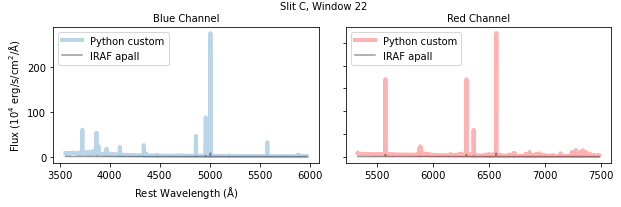

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1,2,figsize=(10,2.5))
plt.subplots_adjust(wspace=0.1)
(ax1,ax2)= axes

ax1.annotate('Slit C, Window 22', 
                        xy = (0.4,0.95), xytext = (0.45,0.95), 
                        xycoords='figure fraction', size = 10)

ax1.set_title('Blue Channel', fontsize=10)
ax1.plot(xb, yb, alpha=0.3, lw=4, label='Python custom')
#ax1.plot(xl, yl)
#ax1.set_xlim(6563-25,6563+25)
#ax1.set_ylim(0,0.6)
ax1.set_ylabel(r'Flux ($10^4$ erg/s/cm$^2$/$\rm{\AA}$)')
ax1.set_xlabel(r'Rest Wavelength ($\rm{\AA}$)')

ax2.set_title('Red Channel', fontsize=10)
ax2.plot(xr, yr, alpha=0.3, lw=4, color='red', label='Python custom')
#ax2.set_ylim(0,0.6)
ax2.set_yticklabels([0])

#path='../3_SlitC_34win/sin_ajustar/blue_spectra/'
blue=np.loadtxt('../3_SlitC_34win/sin_ajustar/blue_spectra/spectra002.0022.fits.txt', skiprows=0, delimiter="  ")
xb, yb = np.transpose(blue)
xb = xb / (1+z)
yb = yb / 1e4
ax1.plot(xb,yb, color='black', alpha=0.4, label='IRAF apall')

ax1.legend(fontsize=10, loc='upper left')

red=np.loadtxt('../3_SlitC_34win/sin_ajustar/red_spectra/spectra003R.0022.fits.txt', skiprows=0, delimiter="  ")
xr, yr = np.transpose(red)
xr = xr / (1+z)
yr = yr / 1e4
ax2.plot(xr,yr, color='black', alpha=0.4, label='IRAF apall')
ax2.legend(fontsize=10, loc='upper left')

# Save plot
plt.savefig('extraction_procedure1.png',dpi=100,bbox_inches='tight')            
plt.show()

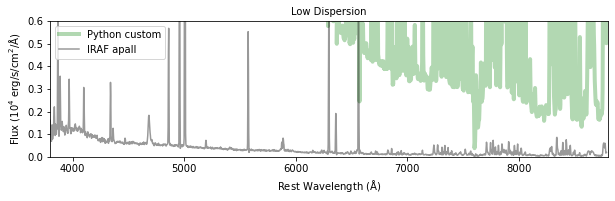

In [ ]:
fig = plt.subplots(1,1,figsize=(10,2.5))
plt.plot(xl,yl, lw=4, color='green', alpha=0.3, label='Python custom')

path='../3_SlitC_34win/sin_ajustar/lowdis_spectra/'
ld=np.loadtxt(path+'spectra004L.0022.fits.txt', skiprows=0, delimiter="  ")
xl, yl = np.transpose(ld)
xl = xl / (1+z)
yl = yl / 1e4
plt.plot(xl,yl, color='black', alpha=0.4, label='IRAF apall')
plt.title('Low Dispersion', fontsize=10)
plt.xlim(3800,8800)
plt.ylim(0,0.6)
plt.ylabel(r'Flux ($10^4$ erg/s/cm$^2$/$\rm{\AA}$)')
plt.xlabel(r'Rest Wavelength ($\rm{\AA}$)')
plt.legend(fontsize=10, loc='upper left')

# Save plot
plt.savefig('extraction_procedure2.png',dpi=100,bbox_inches='tight')            
plt.show()